# Importation des librairies

In [1]:
# OS
import sys

# NUMPY
import numpy as np

# STATS
import scipy.stats as stats
from scipy.stats import norm, skew

# MATPLOTLIB
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('fivethirtyeight') 

# WARNINGS
import warnings
warnings.filterwarnings('ignore')

# PANDAS
import pandas as pd 
pd.set_option("display.max_rows", None, "display.max_columns", None) 

# SEABORN
import seaborn as sns

# SCHIKIT-LEARN: PRE-PROCESSING
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # encodage des variables catégorielles nominales
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder # encodage des variables catégorielles ordinales
from sklearn.preprocessing import StandardScaler # normalisation des variables numériques
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer # imputation
from sklearn.impute import KNNImputer 


# SCHIKIT-LEARN: MODELES
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet

# SCHIKIT-LEARN: VALIDATION CROISEE + OPTIMISATION
from sklearn.model_selection import train_test_split # 
from sklearn.model_selection import cross_val_score # validation croisée pour comparaison entre modèles
from sklearn.model_selection import validation_curve # courbe de validation: visulaisr les scores lors du choix d'un hyperparamétre
from sklearn.model_selection import GridSearchCV # tester plusieurs hyper_paramètres
from sklearn.model_selection import learning_curve # courbe d'apprentissage: visualisation les scores du train et du validation sets en fonction des quanitiés des données
 
## EVALUATION
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
## EVALUATION
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# SCHIKIT-LEARN: PIPELINE
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

# Chargement des données

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

boston_pd = pd.DataFrame(boston.data)
boston_pd.head(10)

boston_pd.columns = boston.feature_names
boston_pd['PRICE'] = boston.target
boston_pd.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


# Description des données

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# Analyse exploratoire

In [5]:
duplicate_Ti = boston_pd[boston_pd.duplicated()]
duplicate_Ti

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


In [6]:
boston_pd.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

# Variable cible

In [7]:
boston_pd["PRICE"].value_counts()

50.0    16
25.0     8
23.1     7
21.7     7
22.0     7
20.6     6
19.4     6
20.1     5
19.6     5
19.3     5
15.6     5
21.4     5
13.8     5
21.2     5
20.0     5
17.8     5
23.9     5
22.6     5
22.2     5
24.4     4
23.2     4
23.8     4
19.1     4
20.3     4
13.4     4
19.9     4
27.5     4
22.8     4
22.9     4
18.9     4
23.0     4
24.8     4
20.4     4
23.3     4
19.5     4
23.7     4
18.5     4
13.1     4
13.3     3
20.8     3
14.1     3
24.3     3
15.2     3
24.7     3
30.1     3
17.4     3
17.1     3
17.2     3
12.7     3
18.4     3
16.1     3
14.9     3
34.9     3
24.1     3
21.9     3
28.7     3
18.2     3
22.5     3
24.5     3
18.7     3
21.0     3
20.5     3
14.5     3
19.8     3
17.5     3
10.2     3
15.0     3
7.2      3
26.6     3
14.4     2
13.5     2
29.8     2
29.6     2
35.4     2
33.2     2
19.2     2
8.4      2
14.6     2
18.6     2
22.7     2
16.5     2
11.9     2
31.5     2
21.5     2
32.0     2
18.3     2
24.6     2
16.7     2
31.6     2
20.7     2
33.4     2

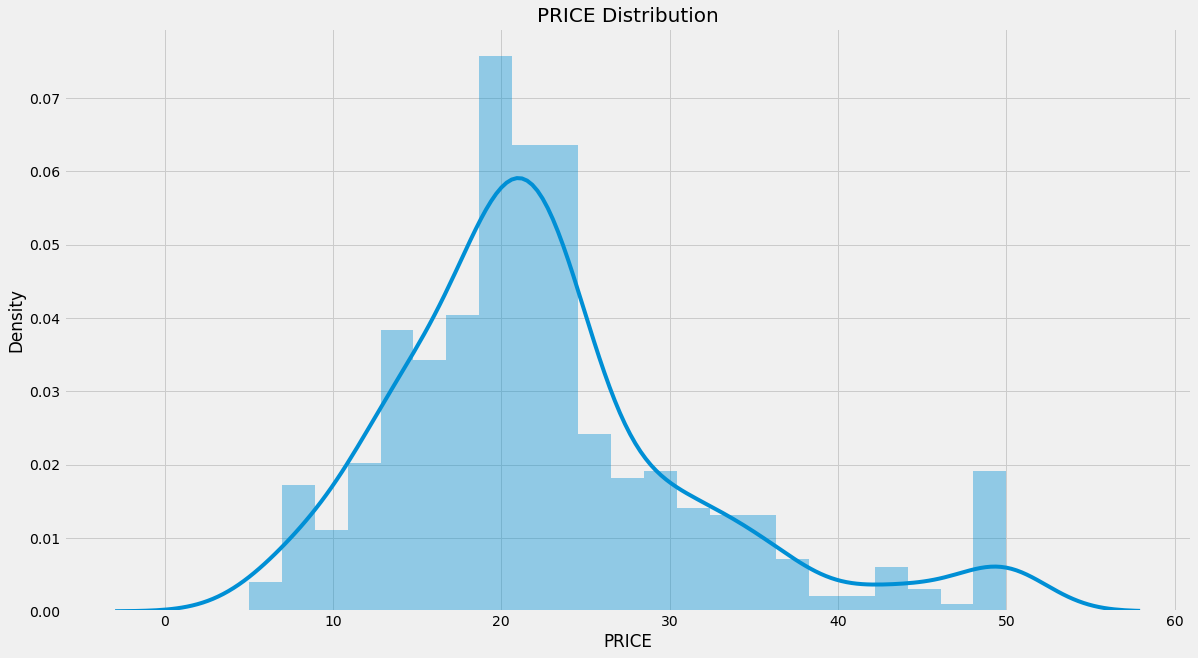

In [8]:
plt.figure(figsize=(18,10))
sns.distplot(boston_pd["PRICE"])
plt.title('{} Distribution'.format("PRICE"), fontsize=20)
plt.show()

# Distibution des variables numériques

In [9]:
boston_pd.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

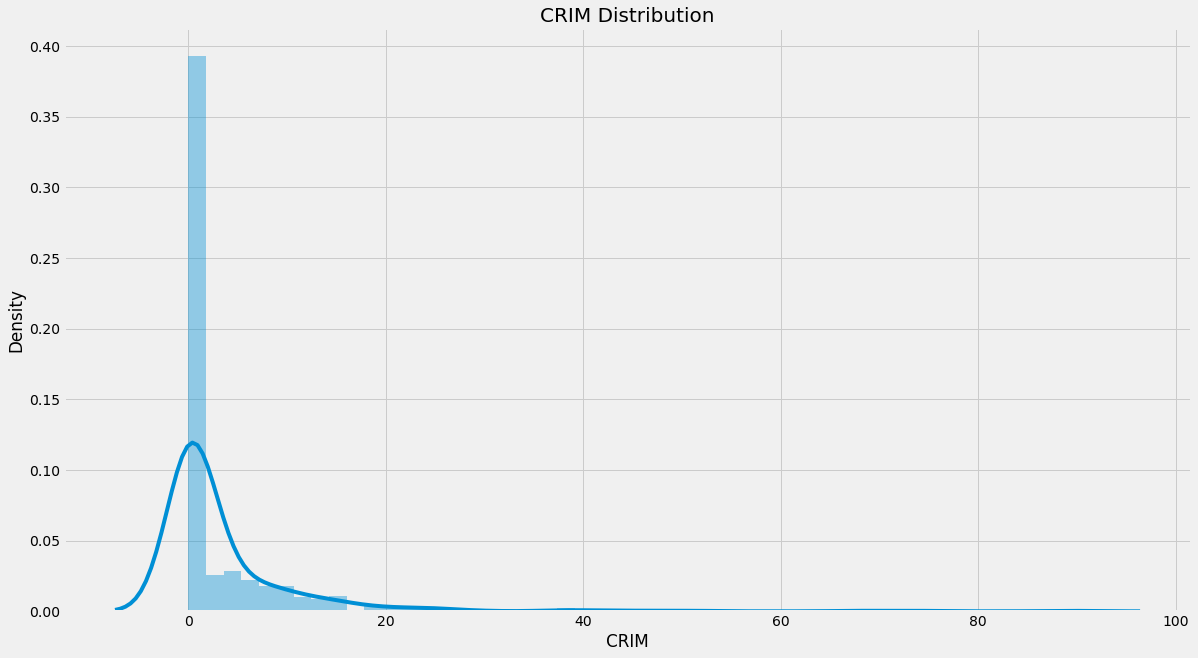

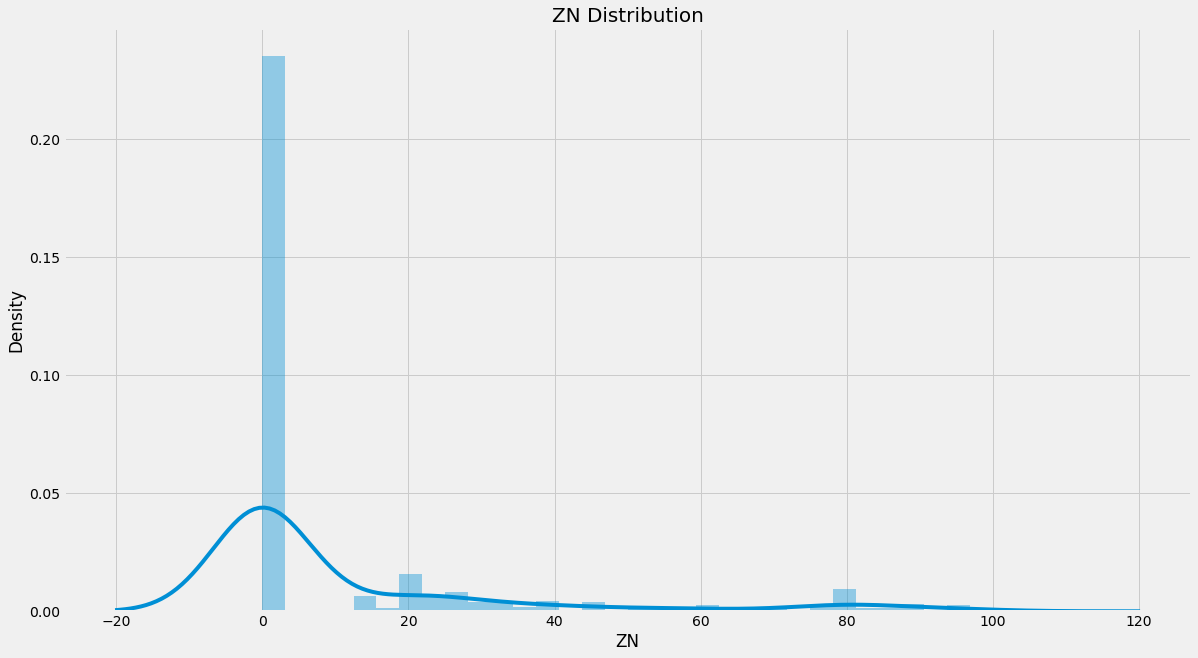

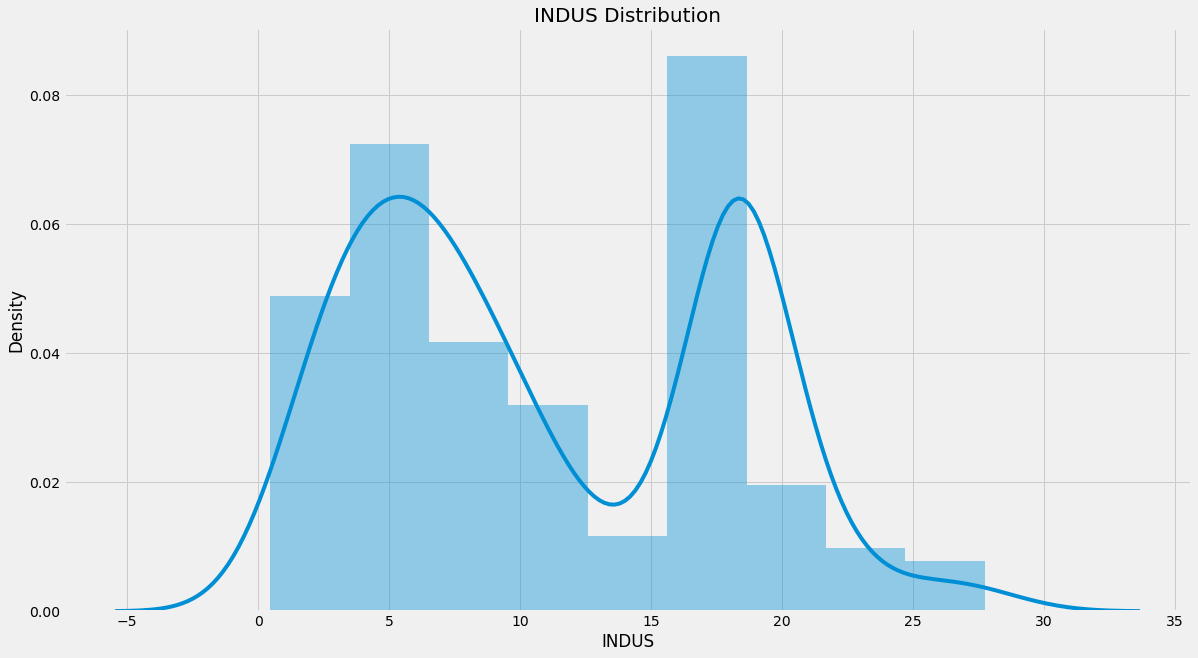

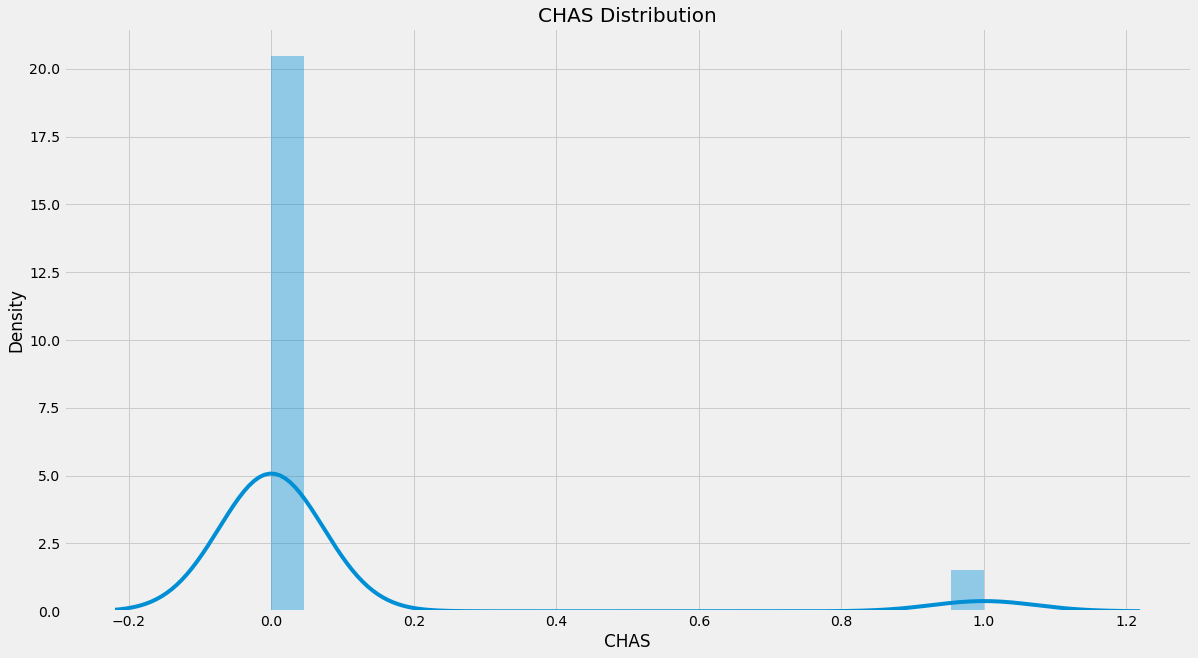

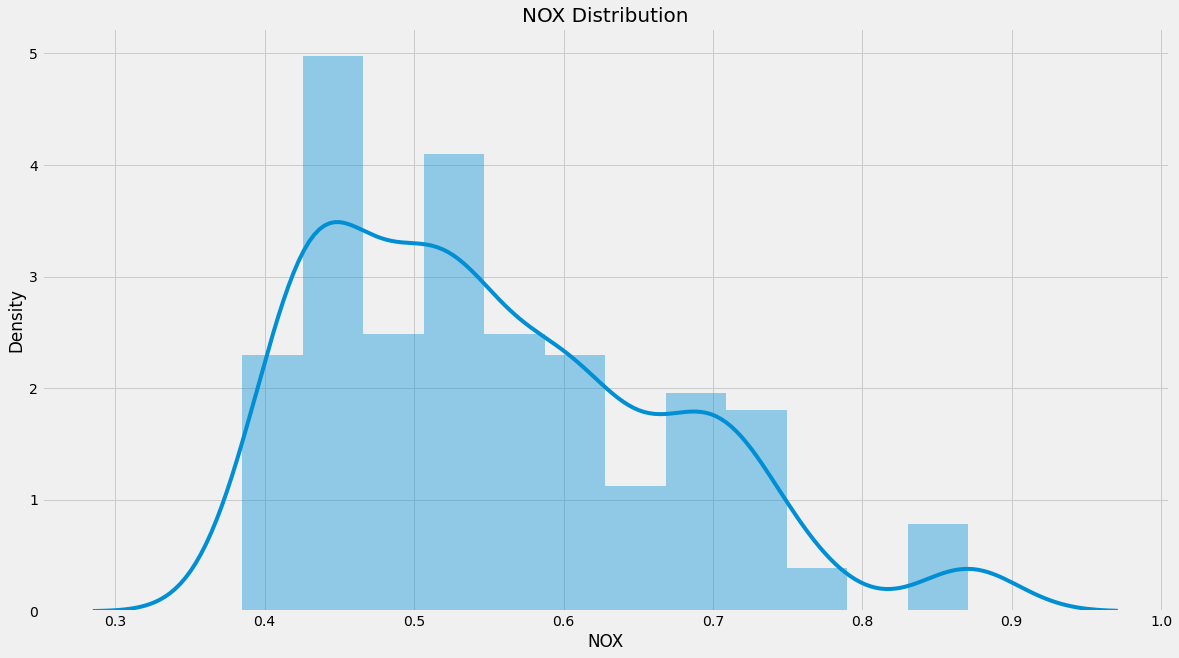

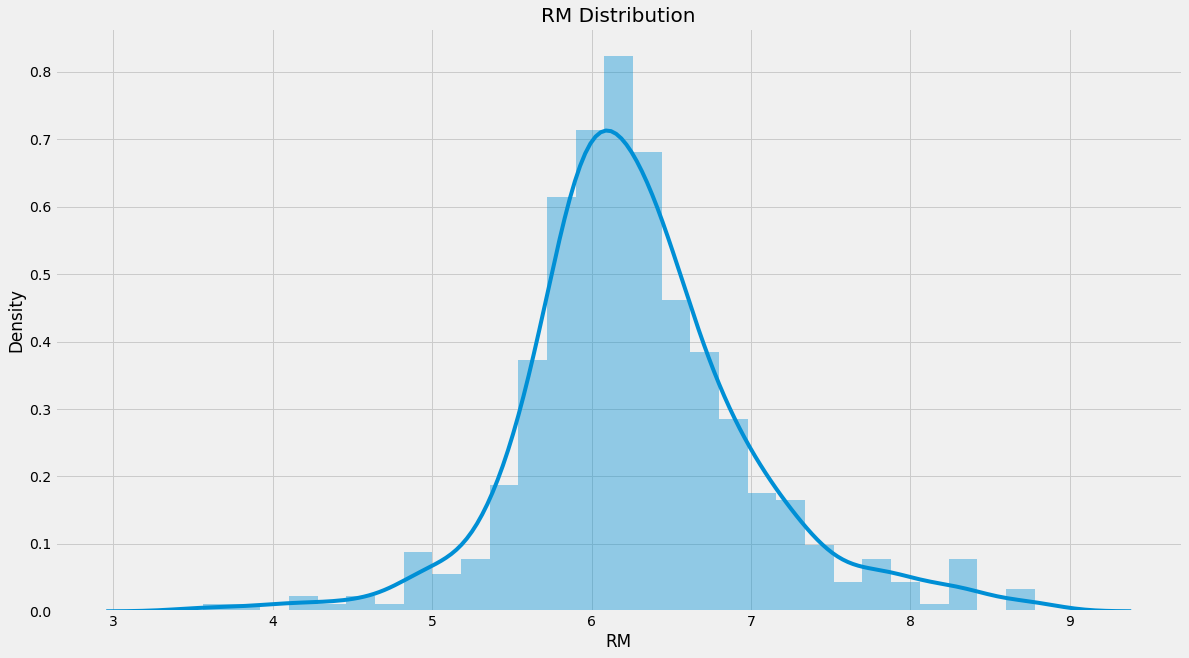

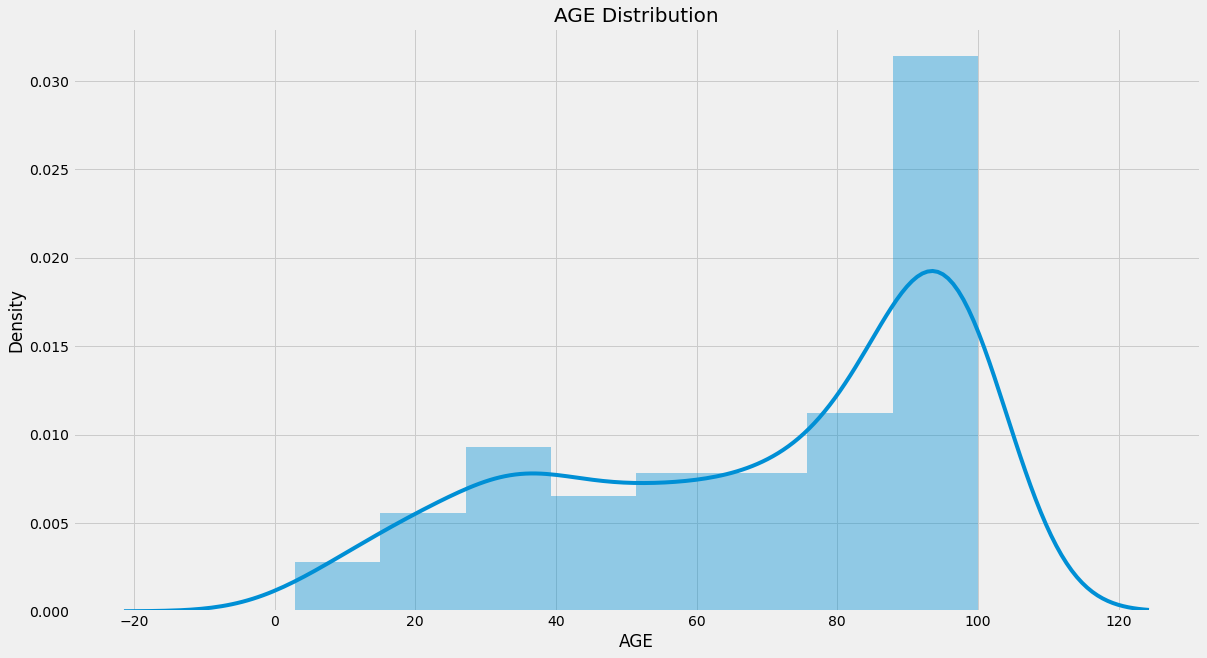

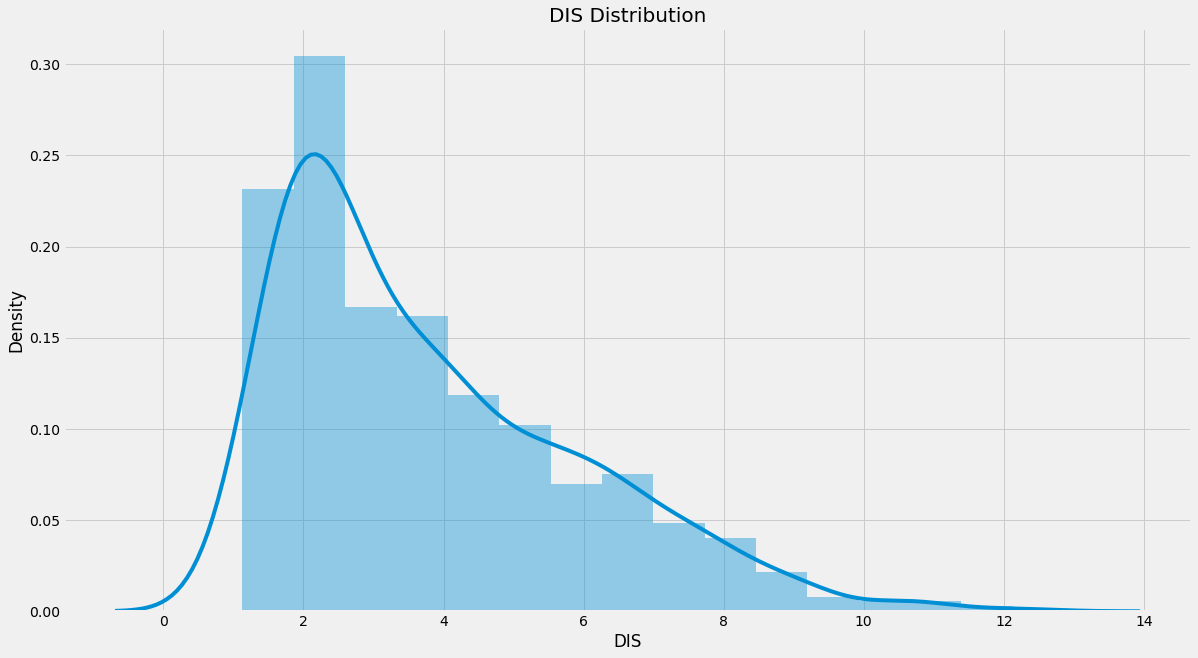

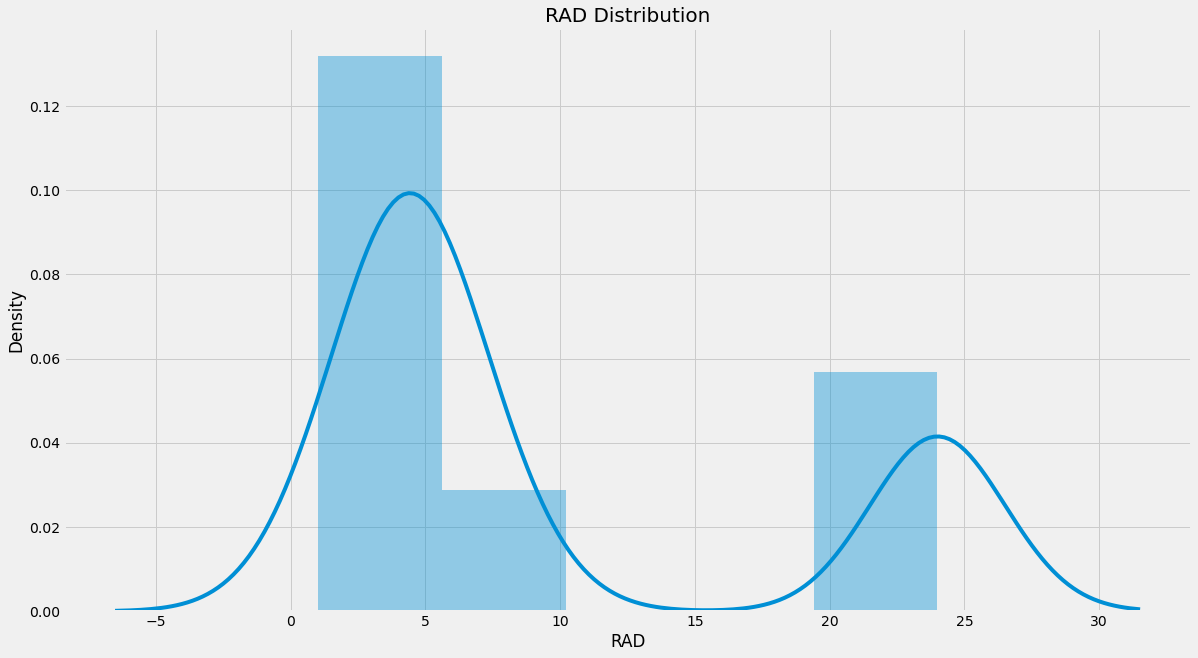

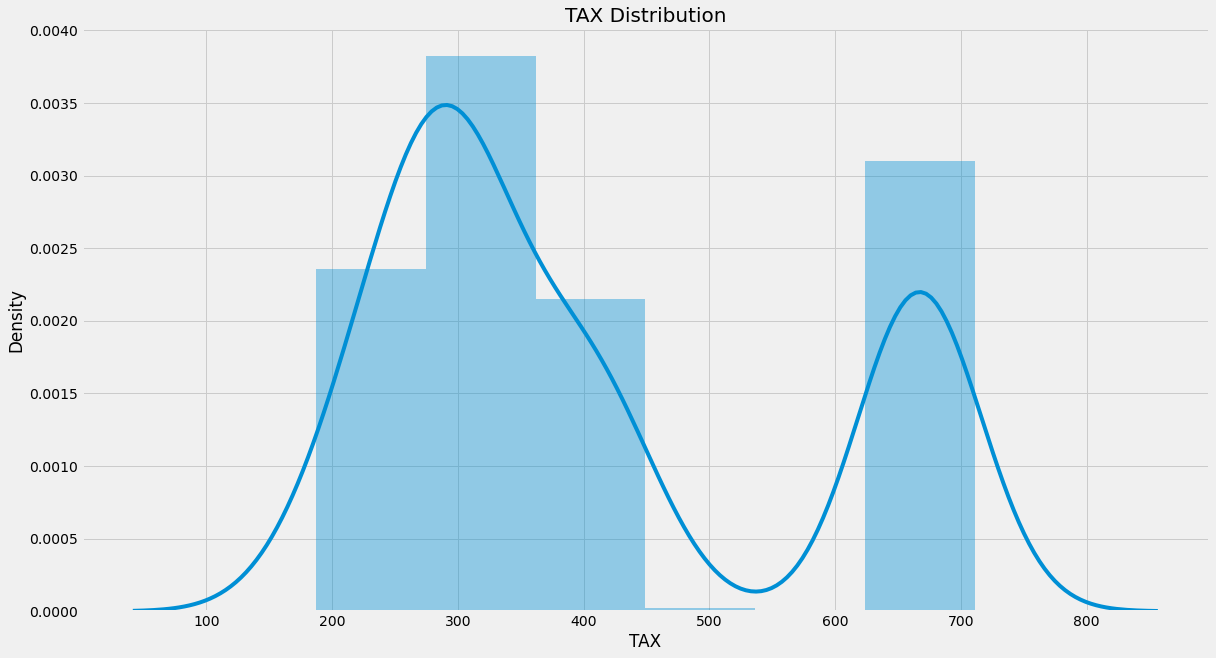

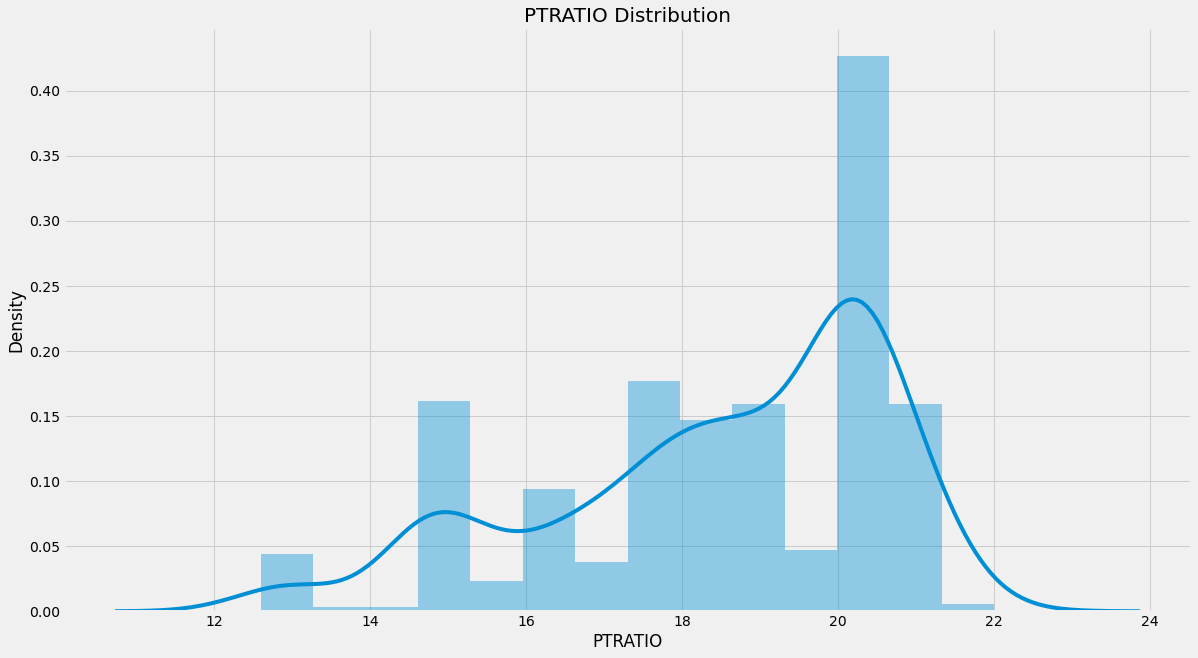

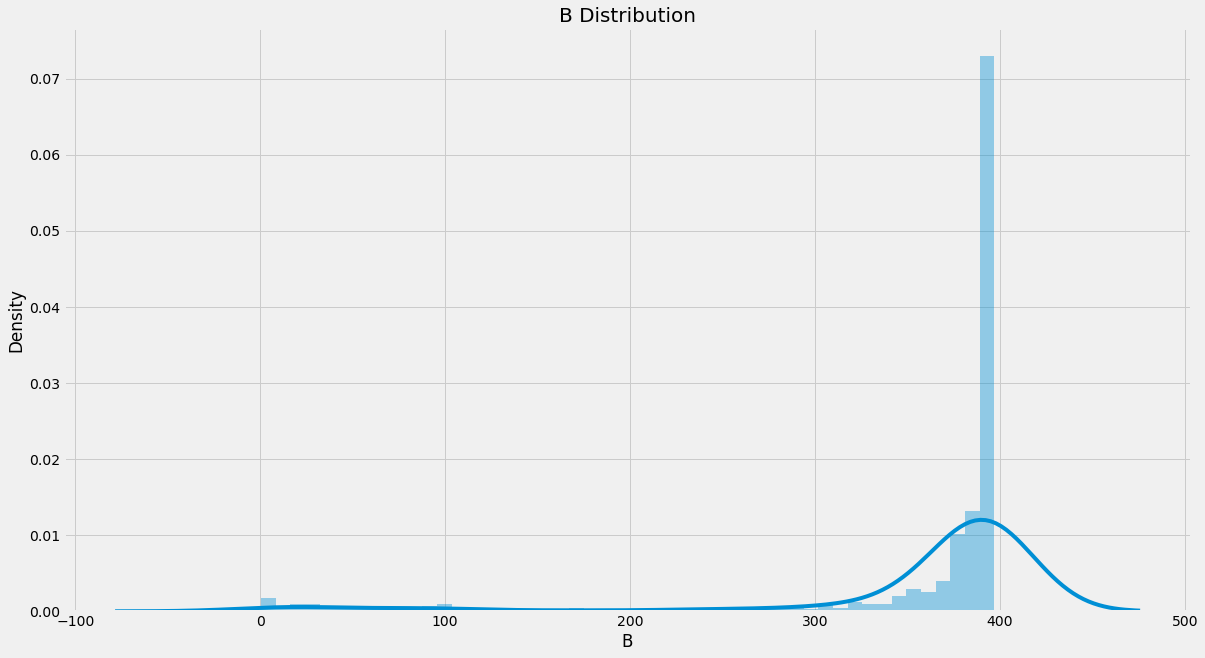

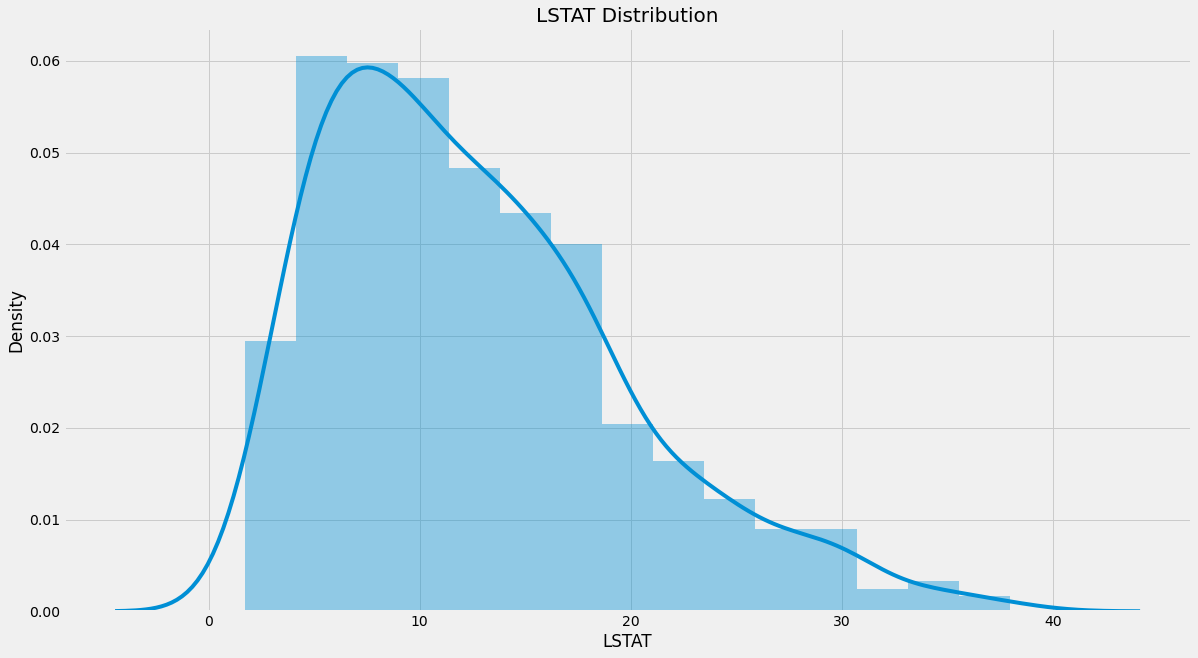

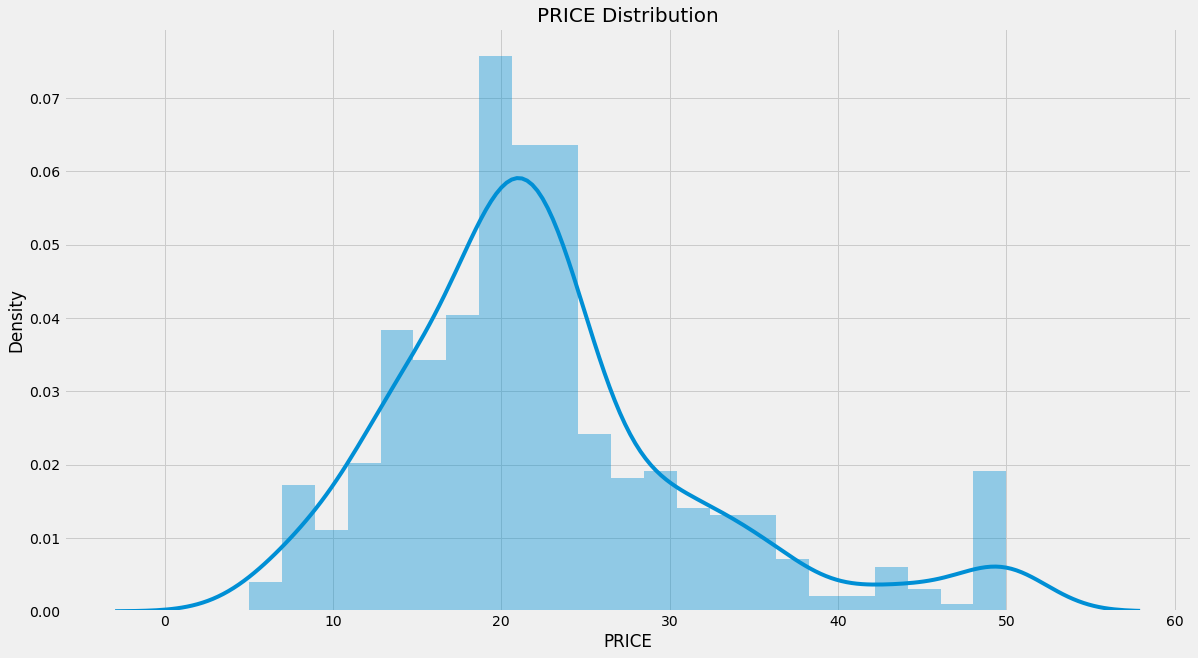

In [10]:
for feature in boston_pd.select_dtypes('float64'):
    plt.figure(figsize=(18,10))
    sns.distplot(boston_pd[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

# Corrélation

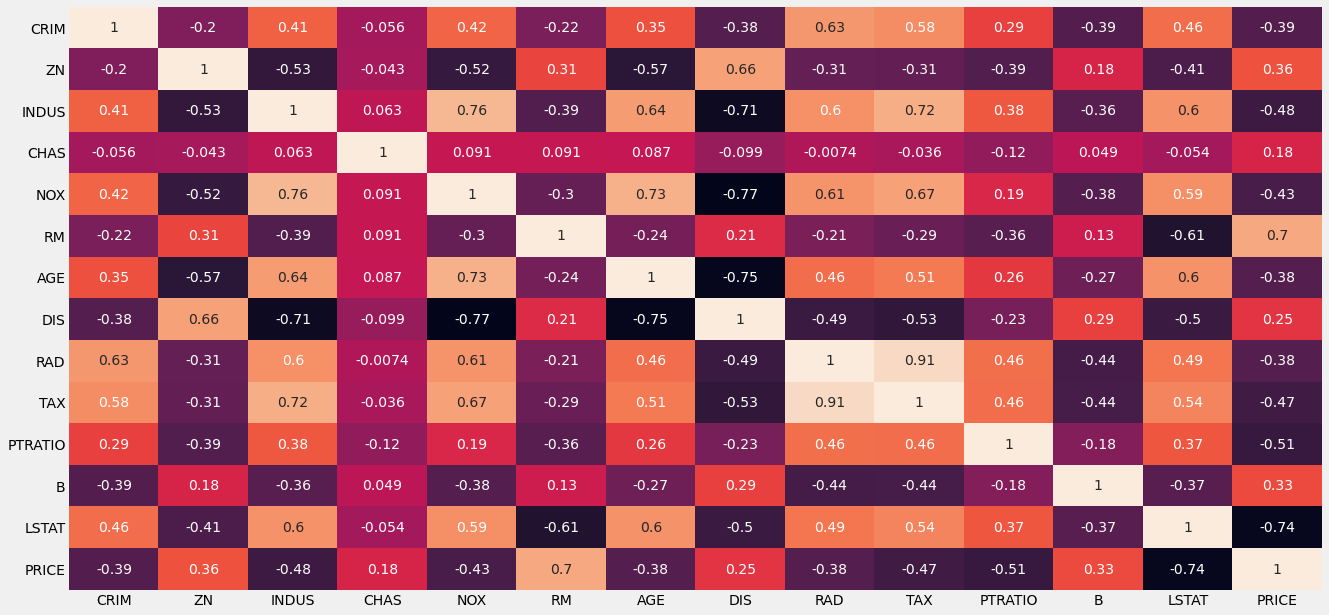

In [11]:
plt.figure(figsize=(20, 10))
sns.heatmap(boston_pd.corr(), annot=True, cbar=False) #
plt.show()

In [12]:
T = []
for i in range(len(boston_pd.corr()['PRICE'])):
    if (abs(boston_pd.corr()['PRICE'][i]) < 0.4):
        T.append(boston_pd.corr()['PRICE'].index[i])

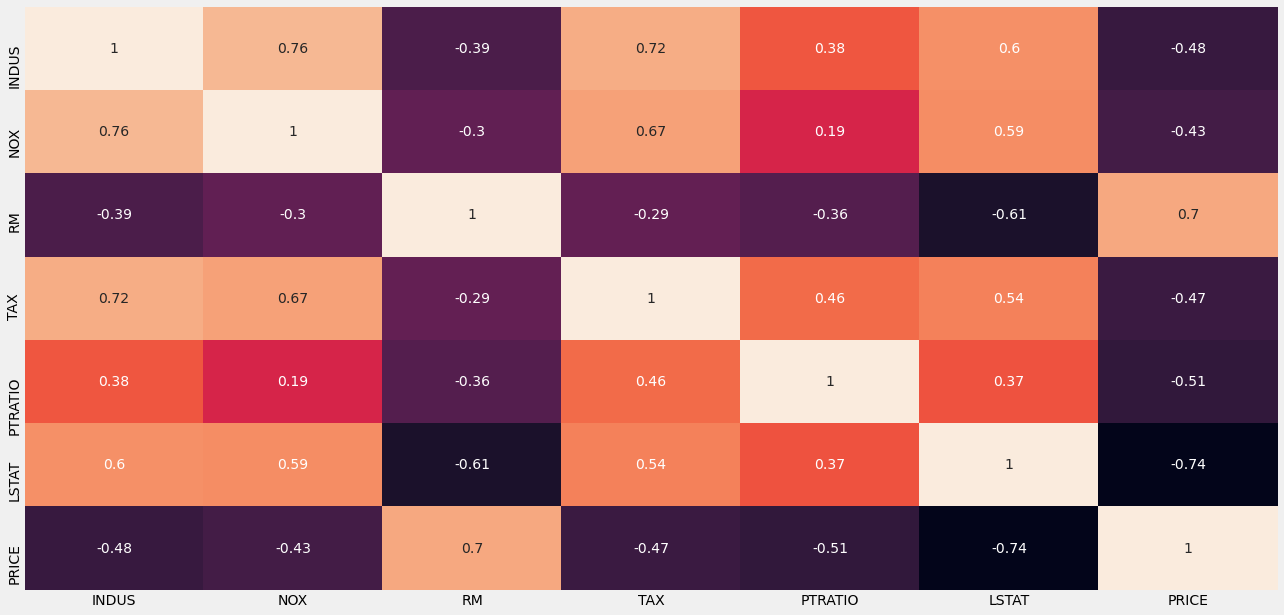

In [13]:
for i in T:
    del boston_pd[i]
plt.figure(figsize=(20, 10))
sns.heatmap(boston_pd.corr(), annot=True, cbar=False) #
plt.show()

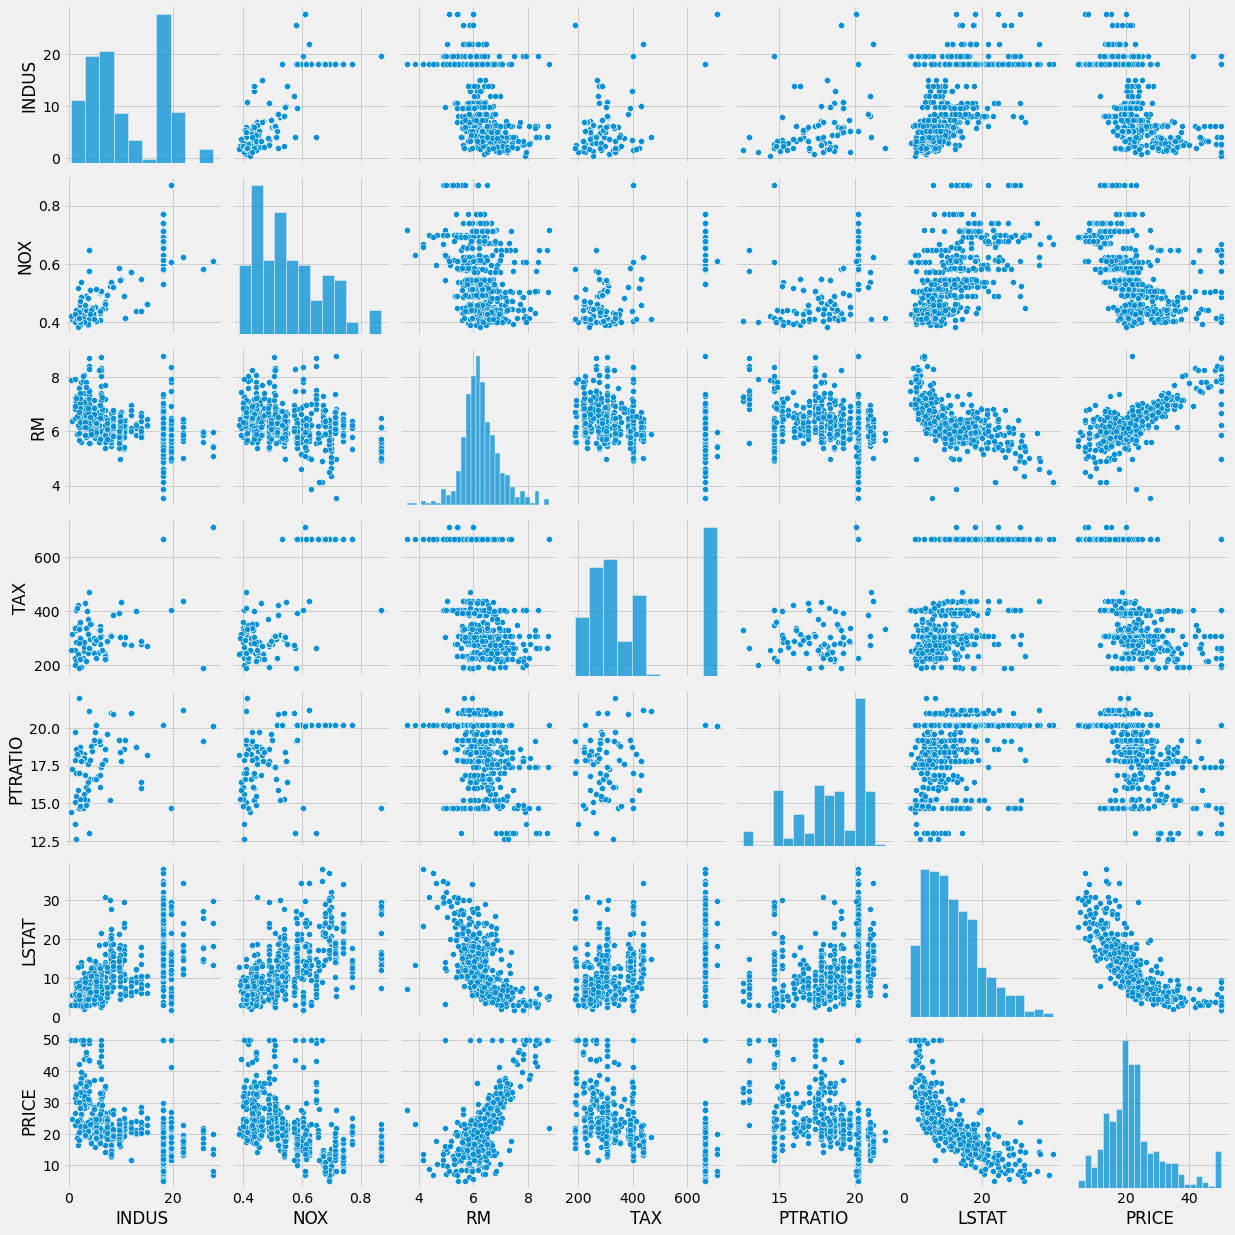

In [14]:
sns.pairplot(boston_pd)
plt.show()

# Pré-Traitement

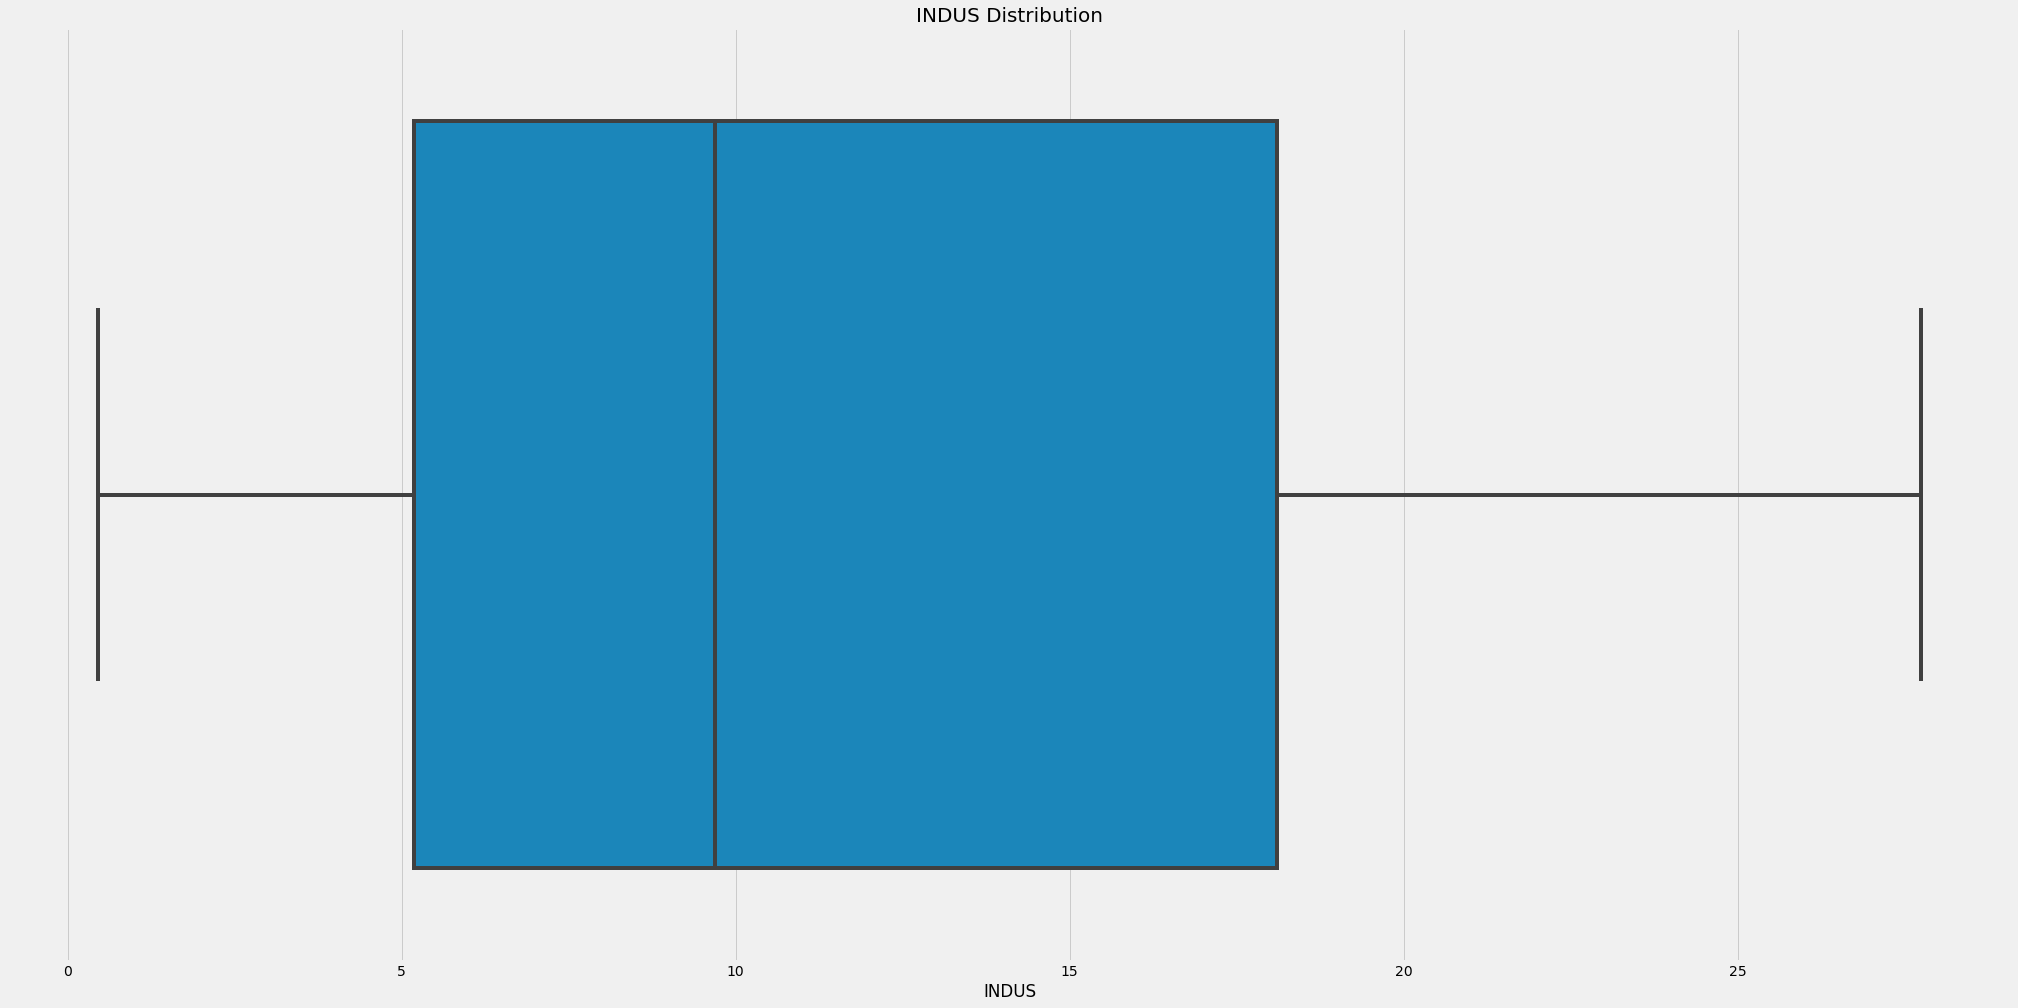

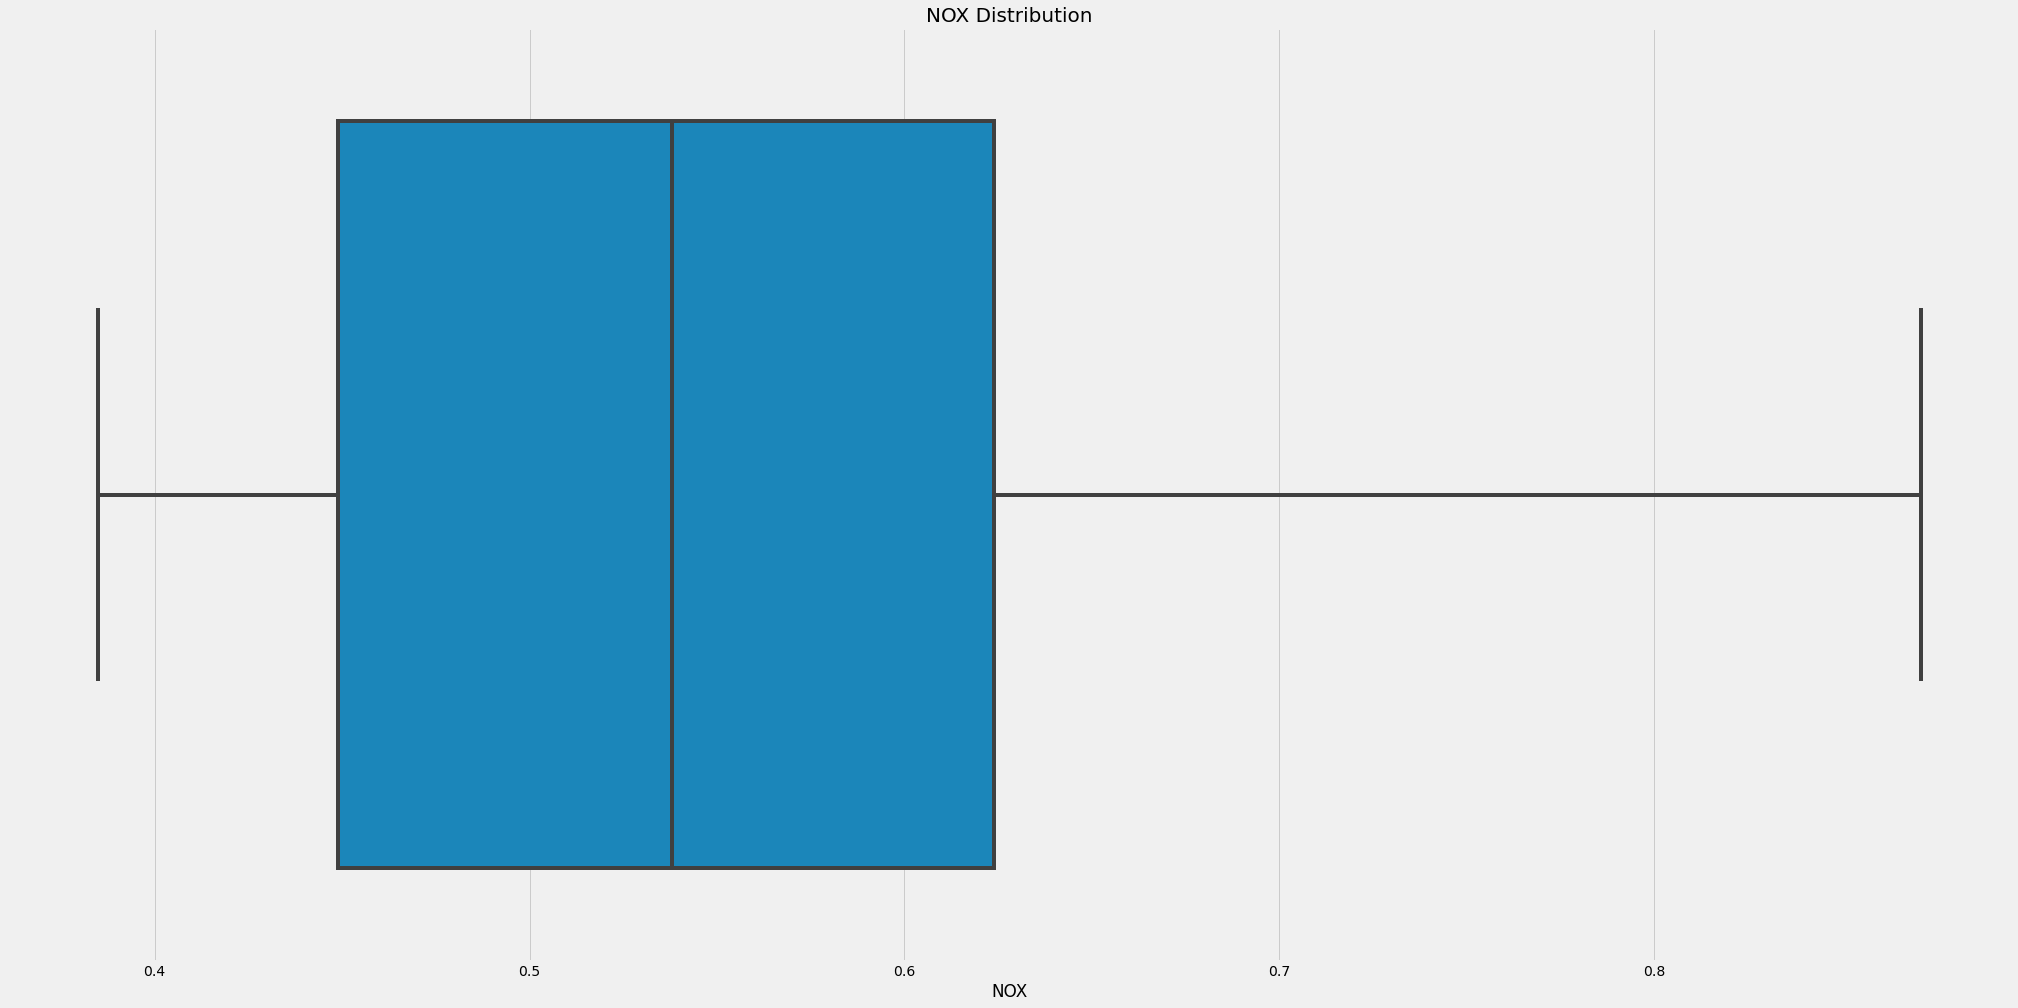

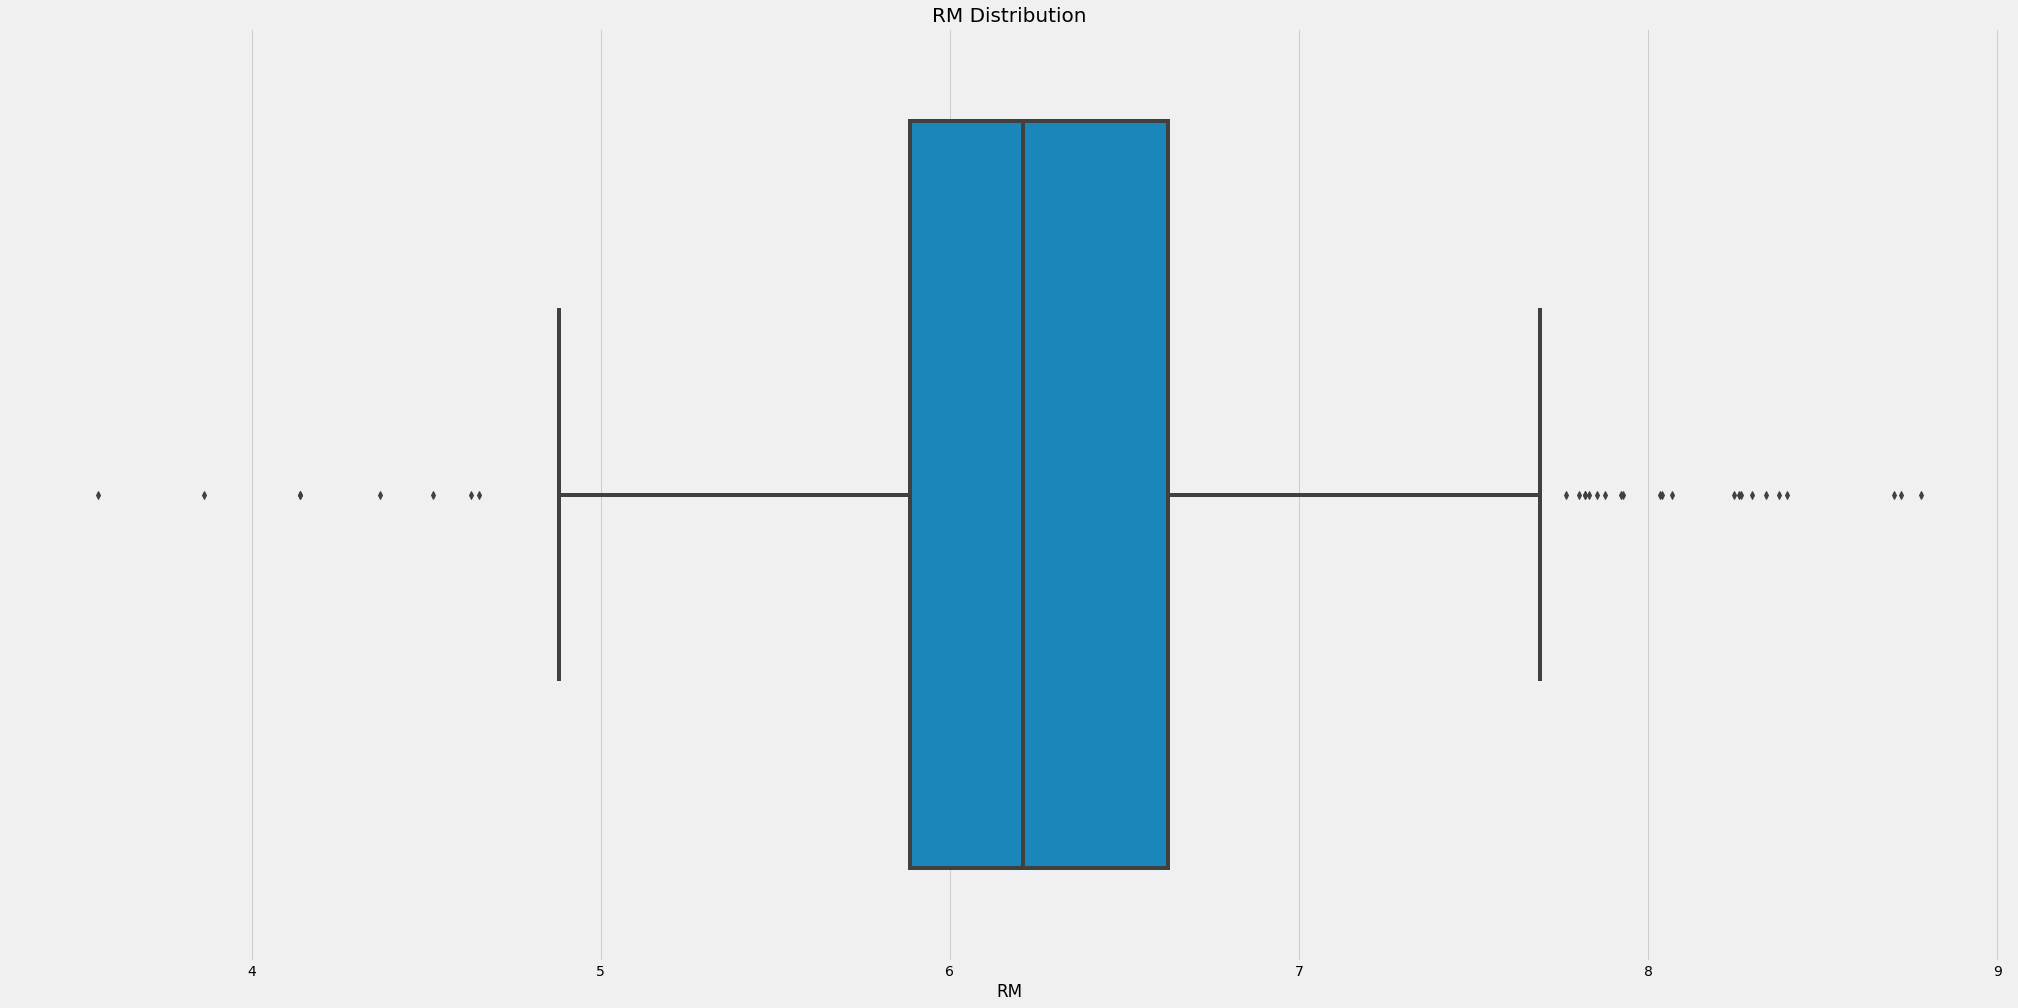

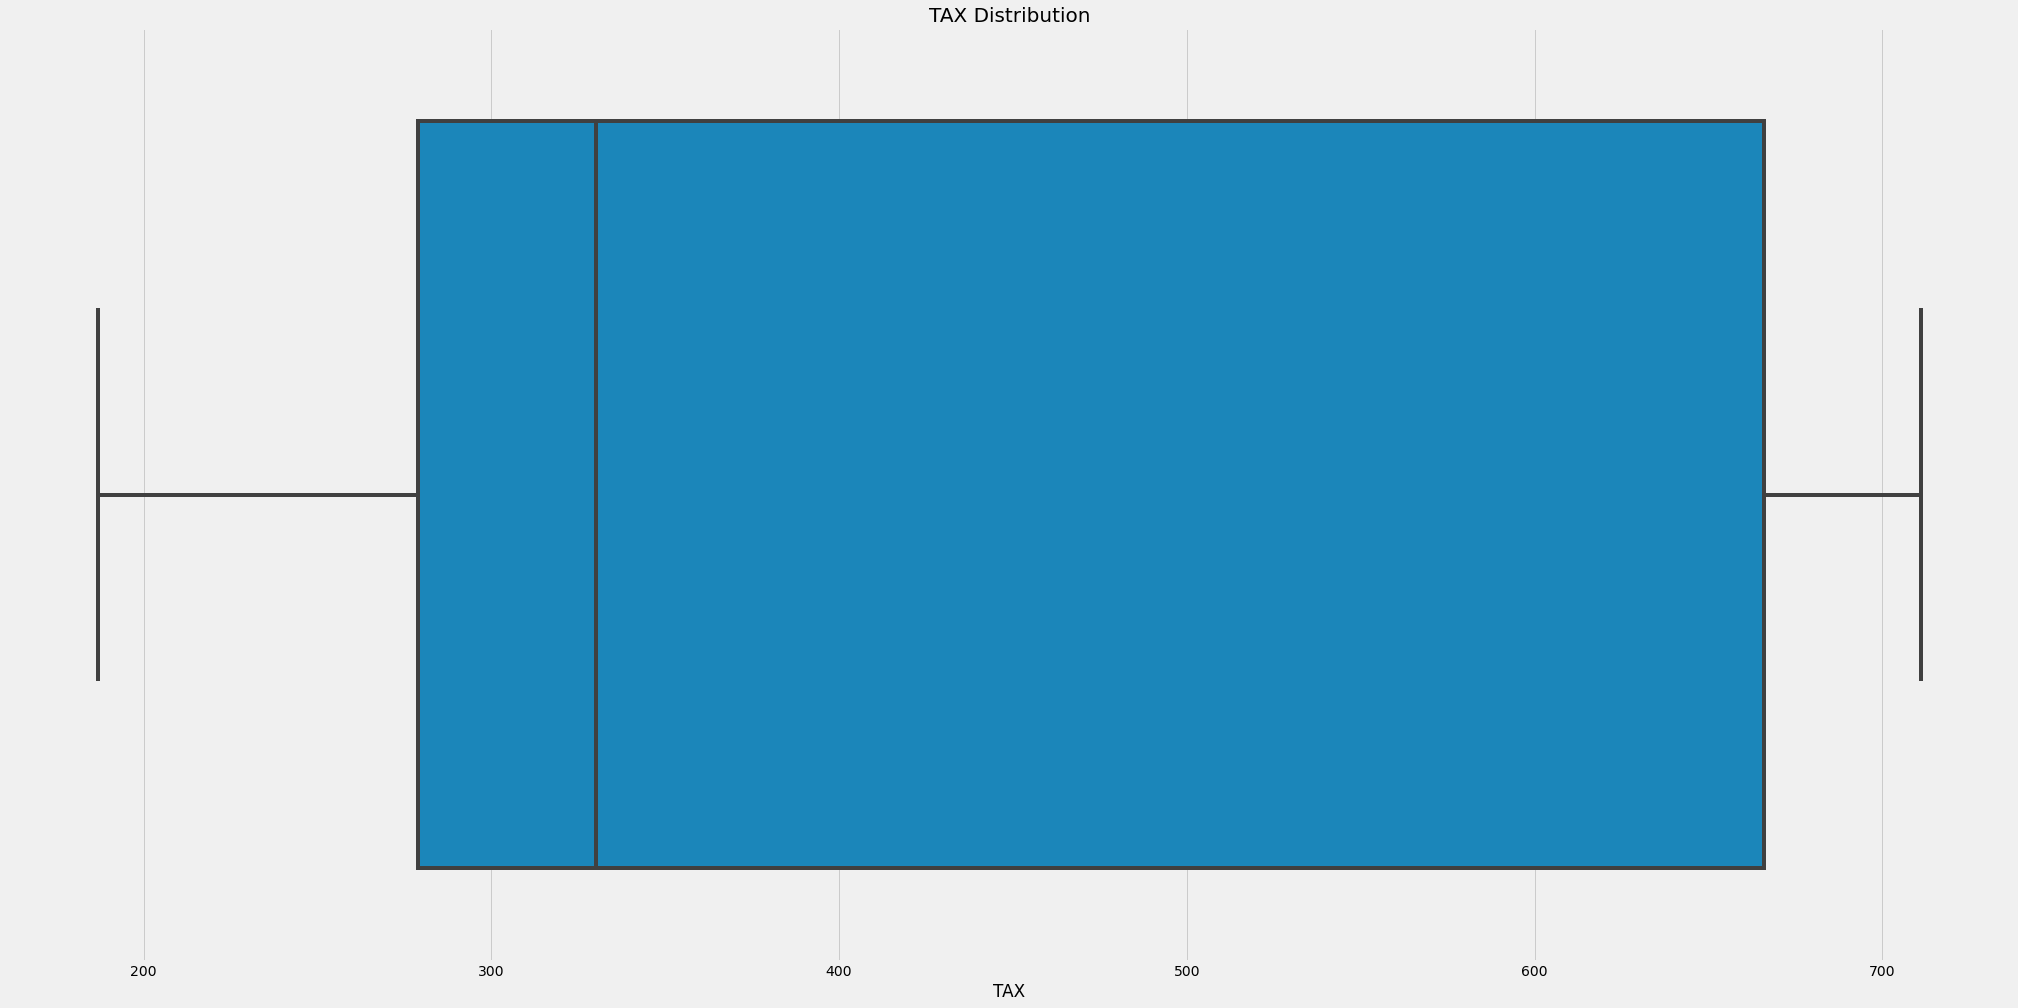

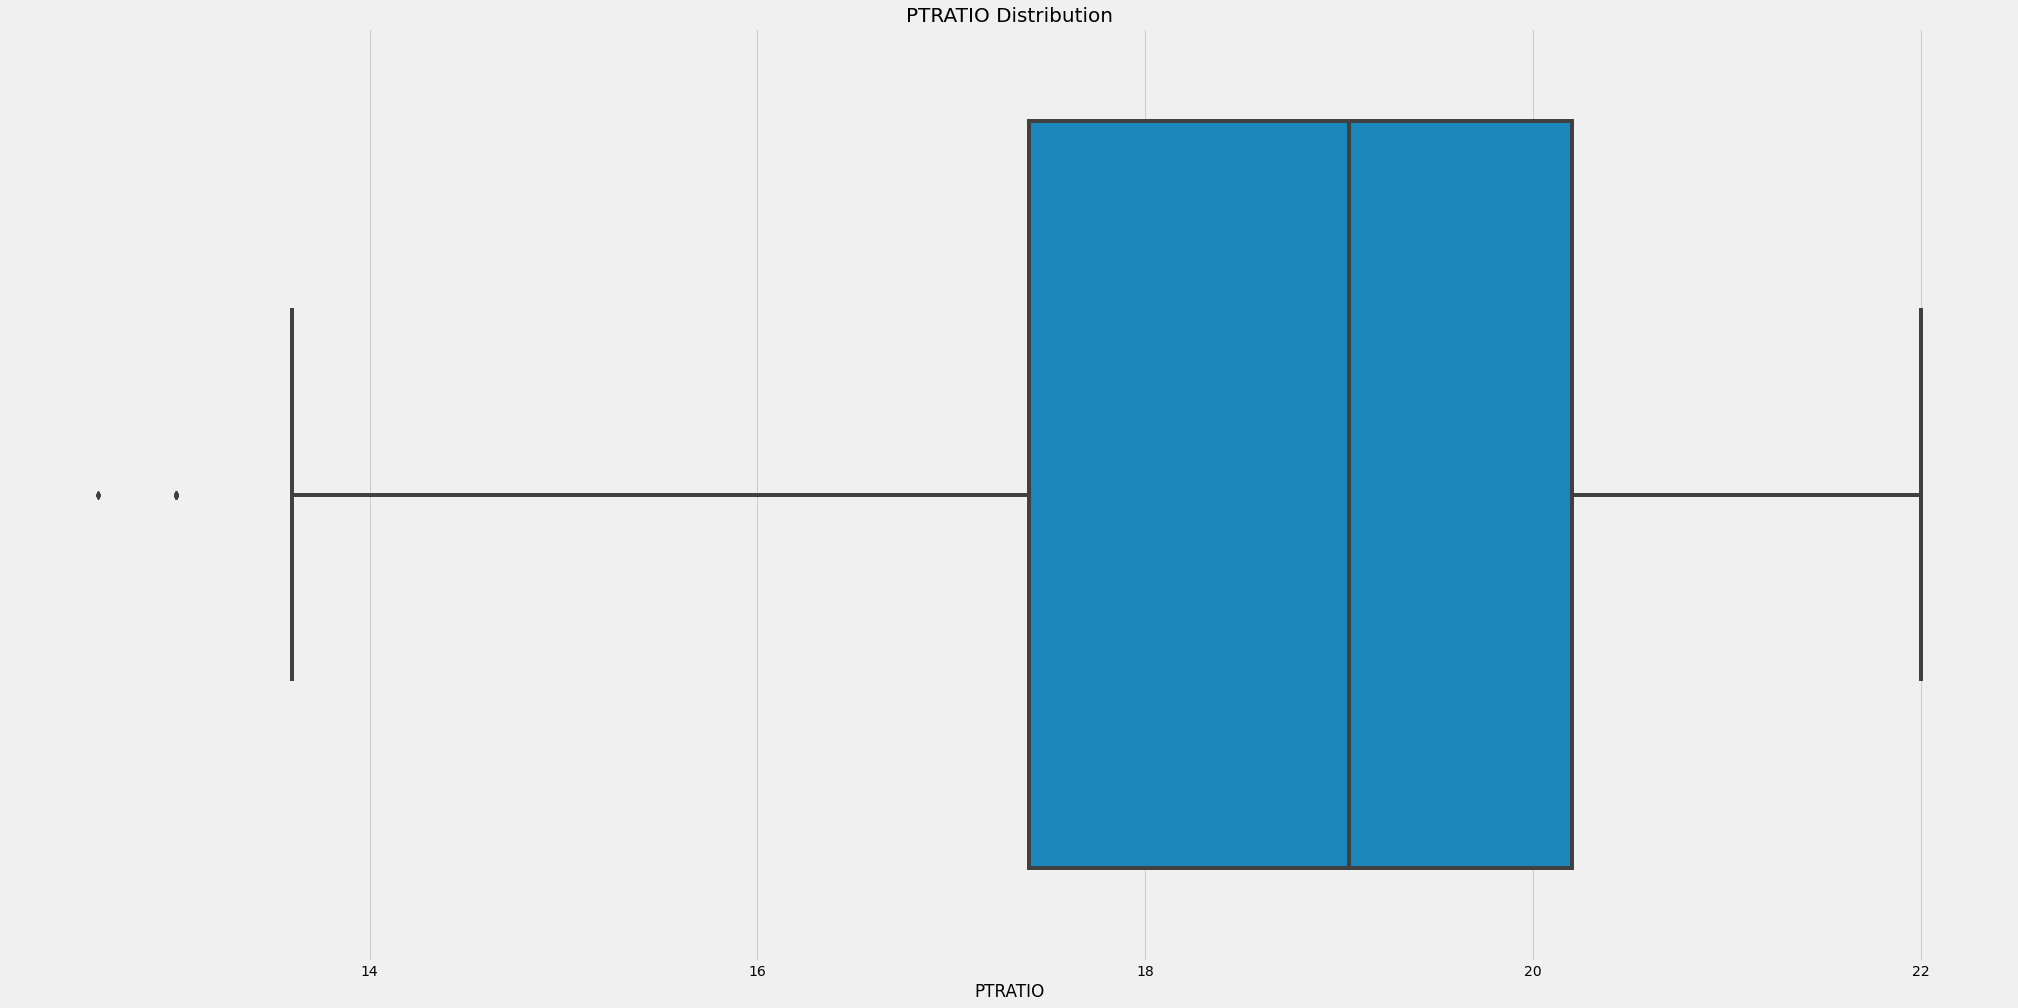

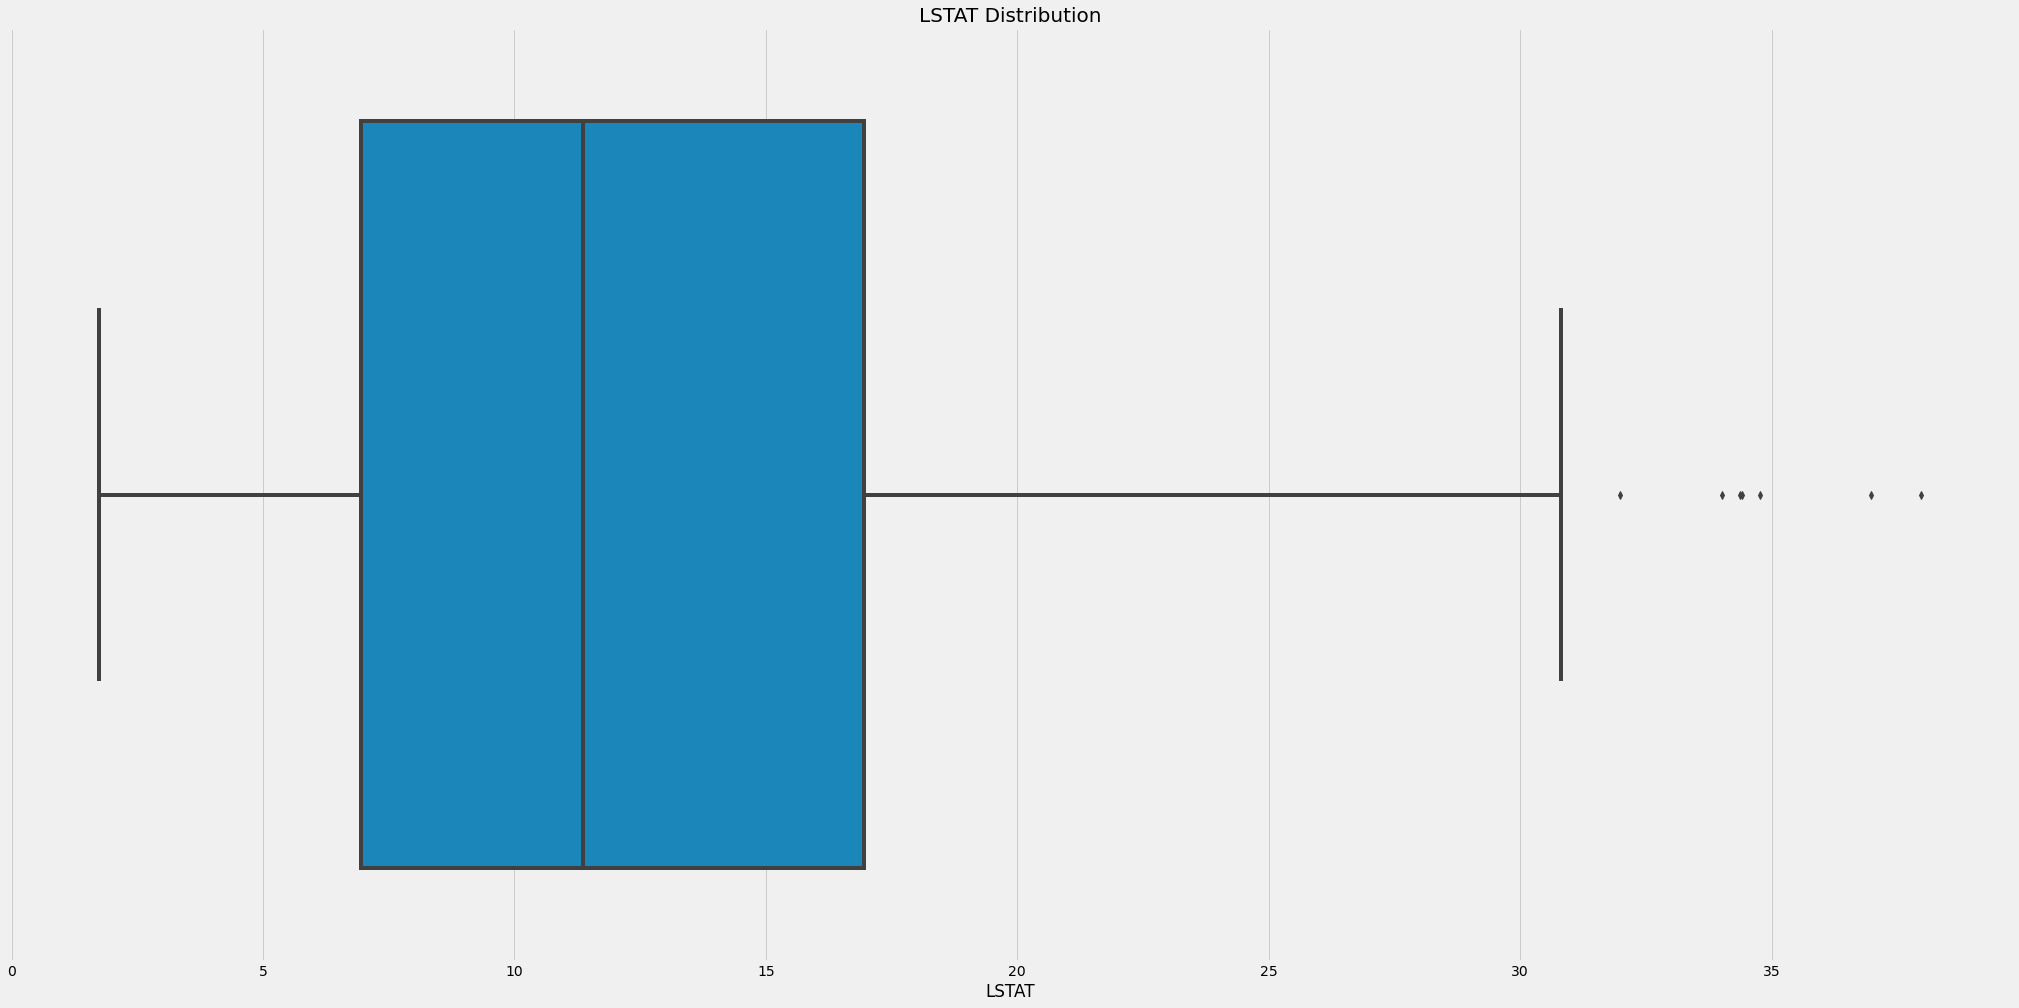

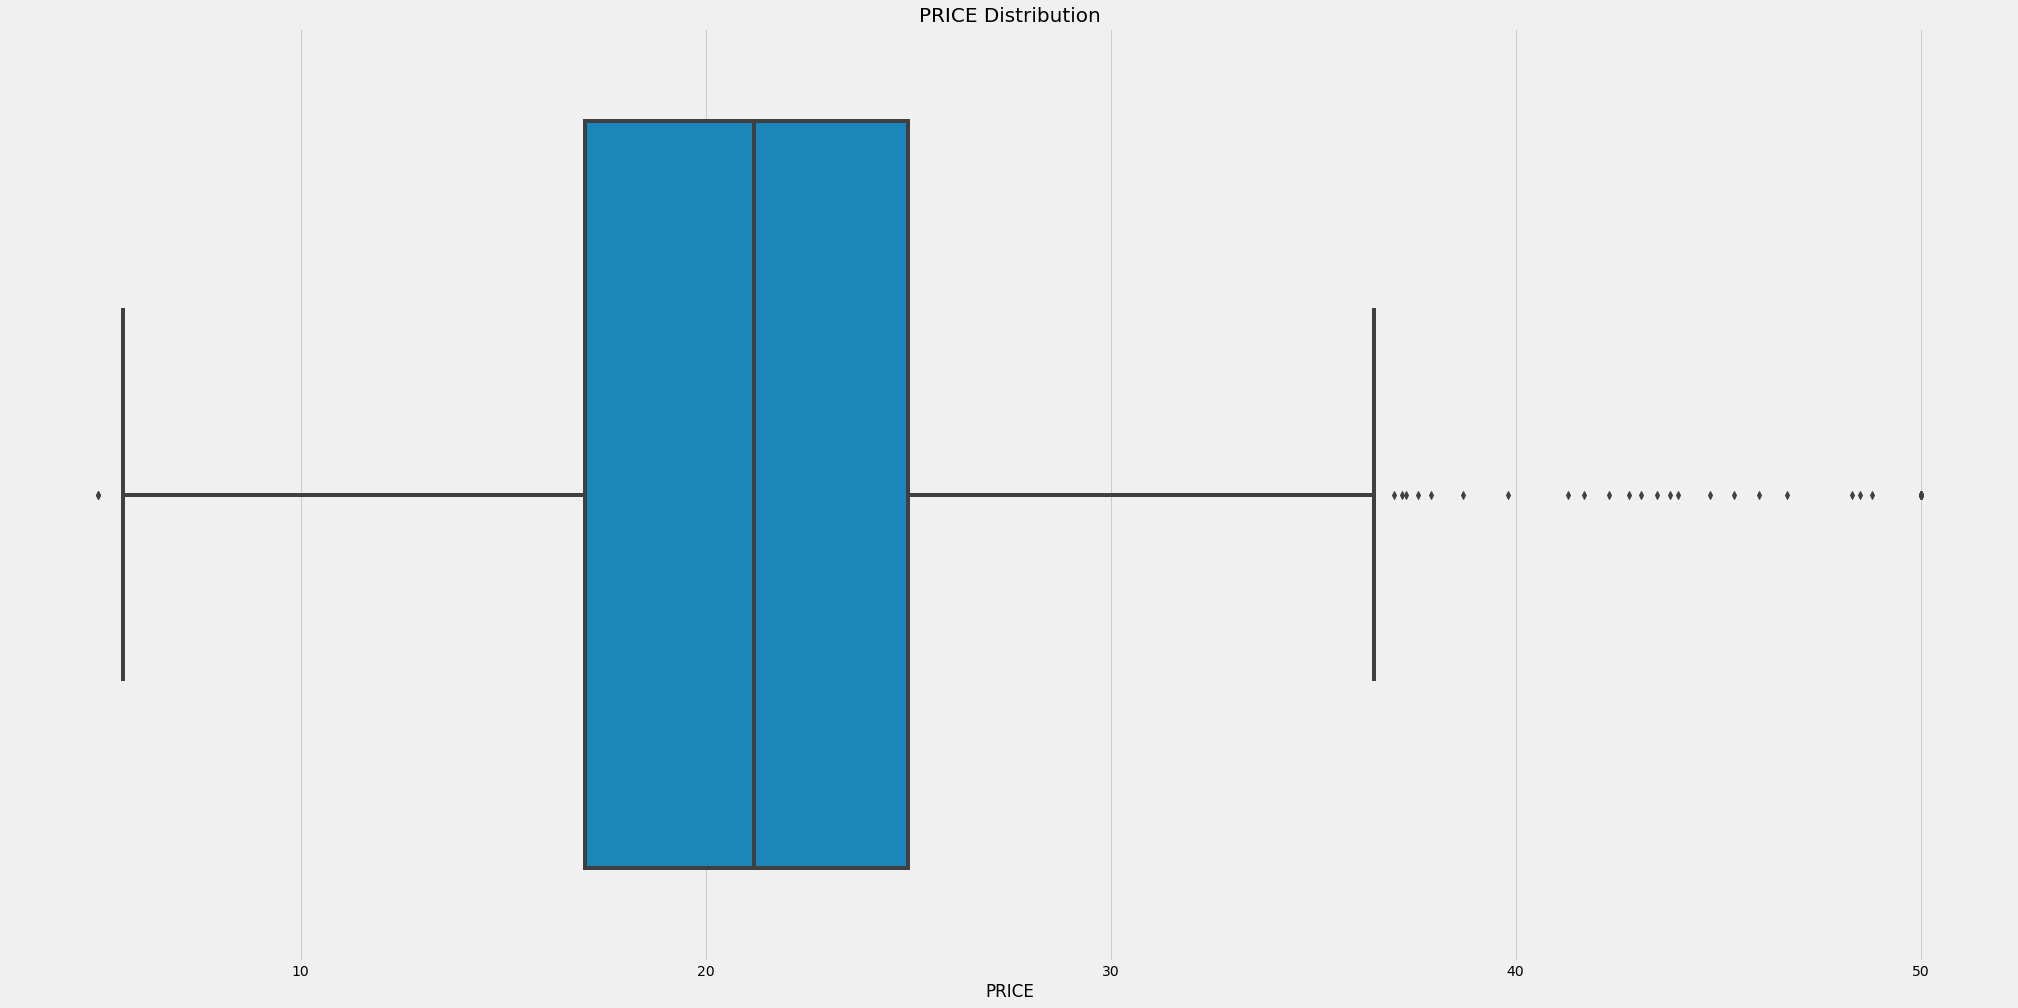

In [15]:
for feature in boston_pd.select_dtypes('float64'):
    plt.figure(figsize=(32,16))
    sns.boxplot(x=boston_pd[feature], data=boston_pd, hue='PRICE')
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

In [16]:
boston_pd = boston_pd[boston_pd['PTRATIO'] > 13.5]
boston_pd = boston_pd[boston_pd['PRICE'] < 37]
boston_pd = boston_pd[boston_pd['PRICE'] < 37]
boston_pd = boston_pd[boston_pd['RM'] > 4.75]
boston_pd = boston_pd[boston_pd['RM'] < 7.66]

# X_train, X_test, y_train, y_test

In [17]:
X = boston_pd.drop('PRICE', axis=1)
y = boston_pd['PRICE']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)

In [19]:
len(y_train), len(y_test)

(358, 90)

In [20]:
X_train.head()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
345,4.39,0.442,6.014,352.0,18.8,10.53
480,18.10,0.532,6.242,666.0,20.2,10.74
5,2.18,0.458,6.430,222.0,18.7,5.21
59,5.13,0.453,5.927,284.0,19.7,9.22
493,9.69,0.585,5.707,391.0,19.2,12.01


# Regression linéaire simple

In [21]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred_train = linreg.predict(X_train)
y_pred = linreg.predict(X_test)

In [23]:
# score sur le test d'entraintement
# R2: évalue la performance du modèle par rapport au niveau de variation présent dans les données 
score = linreg.score(X_train, y_train)
score

0.7192811308806724

In [24]:
# score sur le test d'entraintement cross-validé
score_val = cross_val_score(linreg, X_train, y_train, cv=5)
score_val.mean()

0.7020484106598792

In [25]:
score_val = cross_val_score(linreg, X_train, y_train, cv=10)
score_val.mean()

0.7001231370281863

In [26]:
score

0.7192811308806724

In [27]:
score.mean()

0.7192811308806724

In [28]:
# RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse

3.268204903178363

In [29]:
# MAE: valeurs abberrantes
mae = mean_absolute_error(y_train, y_pred_train)
mae

2.5335463499411266

In [30]:
# Median absolute error 
medae= median_absolute_error(y_train, y_pred_train)
medae

2.1553876357304462

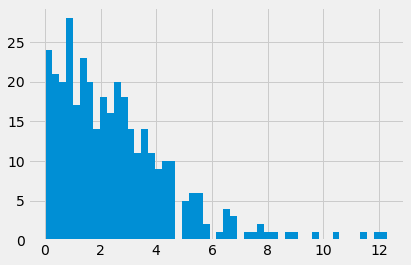

In [31]:
# distribution des erreurs
hist_erreurs = np.abs(y_train - y_pred_train)
plt.hist(hist_erreurs, bins=50)
plt.show()

# Courbe d'apprentissage

In [32]:
N, train_score, val_score = learning_curve(linreg, X_train, y_train, # vidéo 21
                                               cv=4,
                                               train_sizes=np.linspace(0.1, 1, 10))

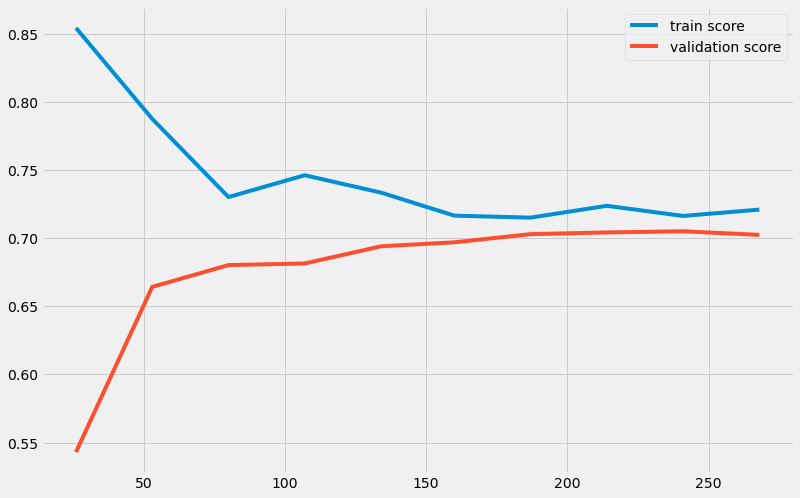

In [33]:
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()
plt.show()

<AxesSubplot:xlabel='PRICE'>

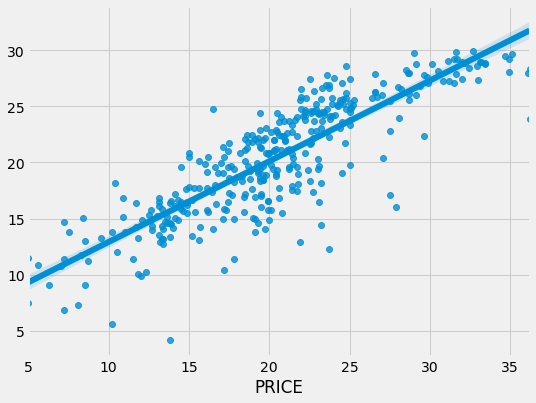

In [34]:
# visulation de la droite linéaire
plt.rcParams["figure.figsize"] = (8,6)
sns.regplot(x=y_train,y=y_pred_train)

Text(0.5, 1.0, 'Résidus')

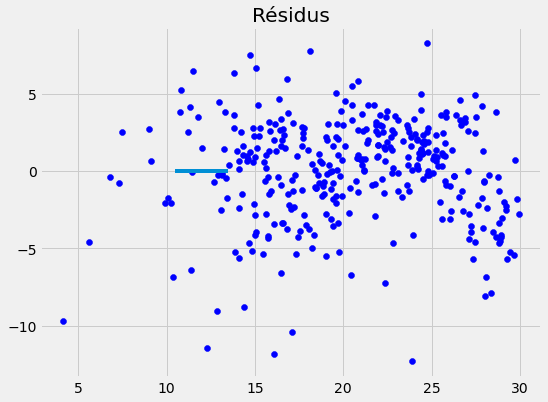

In [35]:
# Distributions des résidus
xmin=10.5
xmax=13.5
x_plot = plt.scatter(y_pred_train, (y_pred_train - y_train), c='b')
plt.hlines(y=0, xmin=xmin, xmax=xmax)
plt.title('Résidus')

<AxesSubplot:title={'center':'Poids de régression'}>

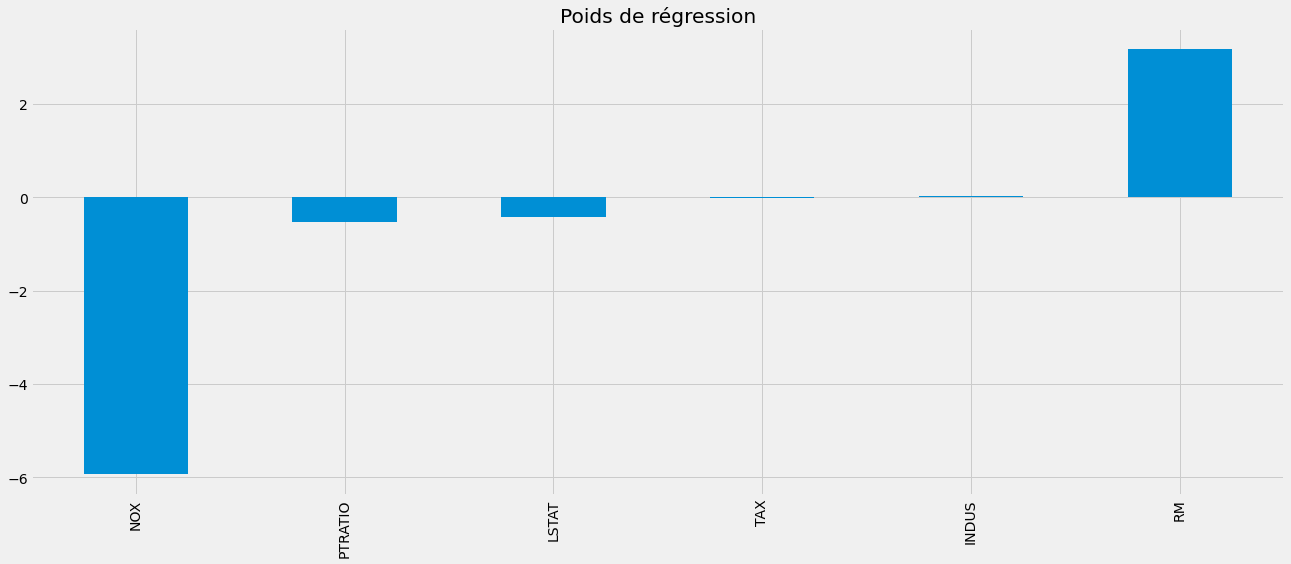

In [36]:
# graphique des coefficients
plt.figure(figsize=(20,8))
predictors = X_train.columns
coef = pd.Series(linreg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Poids de régression')

In [1]:
# predictions finales
predictions_linreg = np.exp(linreg.predict(X_test)) - 1

NameError: name 'np' is not defined

# Regression Ridge

In [52]:
all_data = boston_pd.concat((y_train.loc[:,'MSSubClass':'SaleCondition'], y_test.loc[:,'MSSubClass':'SaleCondition']))
numerical_features = all_data.select_dtypes(include=['int64', 'float64']).columns
numerical_features

AttributeError: 'DataFrame' object has no attribute 'concat'

In [47]:
numerical_pipeline = make_pipeline(SimpleImputer(), 
                                  StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                                   OneHotEncoder())

In [48]:
from sklearn.compose import make_column_transformer
preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                         (categorical_pipeline, categorical_features))

In [49]:
# ridge_pipeline = make_pipeline(processor_lin, RidgeCV())

regRidge1 = make_pipeline(preprocessor, Ridge(alpha=0.6, random_state=1))
regRidge2 = make_pipeline(preprocessor, Ridge(alpha=0.6, random_state=2))

In [50]:
regRidge1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['INDUS', 'NOX', 'RM', 'TAX',
                                                   'PTRATIO', 'LSTAT']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                              

In [51]:
regRidge2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['INDUS', 'NOX', 'RM', 'TAX',
                                                   'PTRATIO', 'LSTAT']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                              

In [45]:
regRidge1.fit(X_train, y_train)
regRidge2.fit(X_train, y_train)
regRidge2.score(X_train, y_train)

ValueError: A given column is not a column of the dataframe

In [ ]:
X_train.head()

In [ ]:
regRidge1.score(X_train, y_train)

In [ ]:
regRidge2.score(X_train, y_train)